# ASCII ART

# First, we get a little help from outside libraries.

In [1]:
%matplotlib inline

import math
from PIL import Image as Image

from __future__ import division
from IPython.display import display

from imageUtils import show_image, set_image, resize_image, convert_image_to_grayscale, get_image_pixel_data
from listUtils import join_list_items, add_to_list, reshape_list

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Grab the image from online.

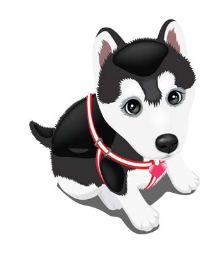

In [2]:
display(set_image)
image = set_image.result
show_image(image)

# Let's look at the size of the image.

In [3]:
(original_width, original_height) = image.size
print 'Width:', original_width, 'px'
print 'Height:', original_height, 'px'

Width: 269 px
Height: 350 px


# We can use the width and height to calulate an aspect_ratio.

In [4]:
aspect_ratio = original_height/original_width
print 'Aspect Ratio:', aspect_ratio

Aspect Ratio: 1.30111524164


# The ratio will help us resize the image.

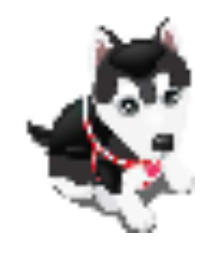

In [5]:
new_width=40
new_height = int(aspect_ratio * new_width)
small_image = resize_image(image, (new_width, new_height))
show_image(small_image)

# Let's make the image black and white.

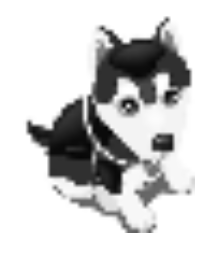

In [6]:
gray_image = convert_image_to_grayscale(small_image)
show_image(gray_image)

# We can see how gray each pixel is as a number.

In this case, 0 is black and 255 is white.

In [7]:
pixels_in_image = list(get_image_pixel_data(gray_image))
print pixels_in_image

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 51, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 244, 40, 237, 248, 251, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 195, 34, 230, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 51, 205, 250, 241, 243, 255, 255, 255, 255, 255

# Here are some characters we want to map the gray values to.

In [8]:
ASCII_A = [ '..', '%%', '@@', '??', 'SS', '++', '..', '**', '::', ',,', '..']
ASCII_B = [ '##', '??', '%%', '..', 'SS', '++', '..', '**', '::', ',,', '@@']
ASCII_C = [ '##', '??', '%%', '..', 'SS', '++', '..', '**', '::', ',,', '..']
ASCII_D = ["$$","@@","BB","%%","88","&&","WW","MM","##","**","oo","aa","hh","kk","bb","dd","pp","qq","ww","mm","ZZ","OO","00","QQ","LL","CC","JJ","UU","YY","XX","zz","cc","vv","uu","nn","xx","rr","jj","ff","tt","//","\\","||","((","))","11","{{","}}","[[","]]","??","--","__","++","~~","<<",">>","ii","!!","ll","II",";;","::",",,",'""',"^^","``","''","..","  "]

# Pick one to be the one you use.

In [14]:
ASCII_CHARS = ASCII_D

In [15]:
range_width = 256/(len(ASCII_CHARS)-1)
print 'Range Width:', range_width

Range Width: 3.71014492754


# Then, we can calculate the index based on the pixel value

In [16]:
pixels_to_chars = []
for pixel_value in pixels_in_image:
    ascii_char_index = int(pixel_value/range_width)
    ascii_char_for_pixel = ASCII_CHARS[ascii_char_index]

    add_to_list(pixels_to_chars, ascii_char_for_pixel)

print pixels_to_chars

['..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', 'kk', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '^^', 'oo', ',,', '``', "''", '..', '..', '..', '..', '..', '..', '..', '..', '..', '..', '..

Right now, we are pretty close.  We need to reshape this one big list of ASCII chars into a rectangle with the expected pixel width and height.

# First, let's make the list of ASCII characters into on big string.

In [17]:
pixels_to_chars_string = join_list_items(pixels_to_chars)
len_pixels_to_chars = len(pixels_to_chars_string)
print 'ASCII string length:', len_pixels_to_chars

ASCII string length: 4156


# Then, we can put the string into a list of lists and combine the rows with line breaks.

In [18]:
ascii_width = new_width * len(ASCII_CHARS[0])
image_ascii = []

for index in xrange(0, len_pixels_to_chars, ascii_width):
    ascii_chars_row_at_index = pixels_to_chars_string[index: index + ascii_width]
    add_to_list(image_ascii, ascii_chars_row_at_index)

# ascii_art = join_list_items(image_ascii, "\n")
ascii_art = reshape_list(pixels_to_chars, ascii_width)
print ascii_art

................................................................................
................................................................................
..................................................................kk............
..............................................................^^oo,,``''........
..................................__**;;......................kk<<''""^^........
................................``,,""aa##..................''kk``vvII^^........
................................``..``^^dd**..''..''^^''..``YYaa;;nnnn^^``......
................................^^((__``kkhh##....MM&&&&WW88hhhhrrnnuu""""......
..............................``^^IIvv''^^kkkkMM**bbddddddbbaa##kk00uu??^^......
..............................^^""uunnvvpp****bbppppppddbbhhaa**&&aaQQvv^^......
..............................^^''uunnmm**##hhkkkkkkkkhhaa**##&&%%hhkkbb^^......
..............................""^^ccLLkk&&******oo******MM&&8888hhkkkkkkhh++....
............................